In [7]:
# Import necessary  libraries here
import sqlite3
import requests

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from model import GarchModel
from data import  AlphavantageApi
from dotenv import load_dotenv
from data import SQLRepository
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Get data


In [ ]:
# Create instance of `AlphaVantageAPI` class
av =  AlphavantageApi()
df_AAPL = av.get_daily(ticker="AAPL")

print("df_AAPL type:", type(df_AAPL))
df_AAPL.head()

df_AAPL type: <class 'pandas.core.frame.DataFrame'>


,open,high,low,close,volume
date,,,,,
2026-01-15,260.650,261.04,257.05,258.21,39388564.0
2026-01-14,259.490,261.82,256.71,259.96,40019421.0
2026-01-13,258.720,261.81,258.39,261.05,45730847.0
2026-01-12,259.160,261.30,256.80,260.25,45263767.0
2026-01-09,259.075,260.21,256.22,259.37,39996967.0


## load the data to the sqlite database


In [3]:
# create a conection to the sqlite database
connection = sqlite3.connect(os.getenv("db_name"), check_same_thread=False)
connection

In [4]:
# Insert `AAPL` data into database
# Import class definition
from data import SQLRepository

# Create instance of class
repo = SQLRepository(connection=connection)
ticker = "AAPL"
response = repo.insert_table(table_name=ticker, records=df_AAPL, if_exists="replace")
response

{'transaction_successful': True, 'records_inserted': 6592}

## read the data abd explore

In [5]:
# Assign `read_table` output to `df_suzlon`
df_aapl = repo.read_table(table_name="AAPL", limit=4000)  # noQA F821
# Print `df_suzlon` info
print("df_suzlon shape:", df_aapl.shape)
print()
print(df_aapl.info())
df_aapl.head()

df_suzlon shape: (4000, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2026-01-15 to 2010-02-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4000 non-null   float64
 1   high    4000 non-null   float64
 2   low     4000 non-null   float64
 3   close   4000 non-null   float64
 4   volume  4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB
None


,open,high,low,close,volume
date,,,,,
2026-01-15,260.650,261.04,257.05,258.21,39388564.0
2026-01-14,259.490,261.82,256.71,259.96,40019421.0
2026-01-13,258.720,261.81,258.39,261.05,45730847.0
2026-01-12,259.160,261.30,256.80,260.25,45263767.0
2026-01-09,259.075,260.21,256.22,259.37,39996967.0


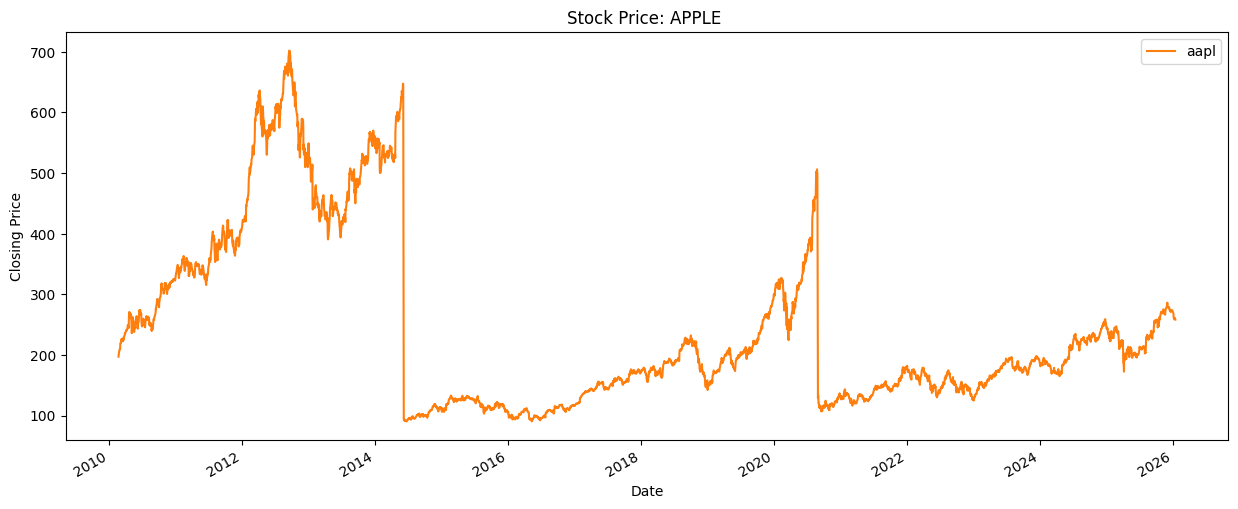

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_aapl["close"].plot(ax=ax, label="aapl", color="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Stock Price: APPLE ")

# Add legend
plt.legend();

In [10]:
# the returns  column
#intantiate the garch model
def wrangle_data(ticker, n_observations):
    """Extract table data from database. Calculate returns.

    Parameters
    ----------
    ticker : str
        The ticker symbol of the stock (also table name in database).

    n_observations : int
        Number of observations to return.

    Returns
    -------
    pd.Series
        Name will be `"return"`. There will be no `NaN` values.
    """
    # Get table from database
    
    df = repo.read_table(table_name=ticker, limit=n_observations+1)


    # Sort DataFrame ascending by date
    df.sort_index(inplace=True)


    # Create "return" column
    df["return"] = df["close"].pct_change() * 100
    


    # Return returns
    return df["return"].dropna()